# Assignment 2.1 - Neural Nets 

In this assignment you implement and train a real NN!

It will be extension of the last task - you neeed to stack a few NN together!

<img src="https://i.redd.it/n9fgba8b0qr01.png" alt="Stack_more_layers" width="400px"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

# Load data 

Split it into training and validation sets.

In [3]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_neural_network(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

# Building step by step

We are going to implement the necessary layers sequentially. Every layer should implement:
- forward pass, that generates layers output and remembers necessary data
- backward pass, that receives the gradient wrt the layer's output and calculates the gradient wtr input and parameters


In [4]:
# TODO: Implement ReLULayer layer in layers.py
# Note: you'll need to copy implementation of the gradient_check function from the previous assignment

X = np.array([[1,-2,3],
              [-1, 2, 0.1]
              ])

assert check_layer_gradient(ReLULayer(), X)

Gradient check passed!


Let's implement fully connected layer, that has two arrays of parameters: W (weights) and B (bias).

Our layers will be using special class of `Param` for all parameters. These params wil use all paramaters and their gradients calculated during back propagation.

This helps to sum gradients from different parts of loss function,i.e, cross-entropy loss и regularization loss.

In [5]:
# Implement FullyConnected layer forward and backward methods
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
# Implement storing gradients for W and B
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

Gradient check passed!
Gradient check passed!
Gradient check passed!


## Creating NN
Now we implement the simplest NN with two fully connected layers and non-linear layer ReLU. A two-layer fully-connected neural network. The net has an input dimension of N, a hidden layer dimension of H, and performs classification over C classes. We train the network with a softmax loss function and L2 regularization on the weight matrices. The network uses a ReLU nonlinearity after the first fully connected layer.

  In other words, the network has the following architecture:

  - input - fully connected layer (W1: shape (D, H)
    b1: shape (H,))
  - ReLU 
  - fully connected layer (W2: shape (H, C)
    b2: shape (C,))
  - output - softmax
  
Function `compute_loss_and_gradients` should implement forward and back propagation through both layers to calculate gradients.

Don't forget to empty the gradients at the start of the function.

In [6]:
b = np.array([1,2,3])
print(b.shape)
c = np.reshape(b,(-1,3))

d = c[:, np.newaxis]
print(d)
np.array(c).shape

(3,)
[[[1 2 3]]]


(1, 3)

In [7]:
b = np.array([[1,2,3], [-1,6,4]])
print(b)
c = np.sum(b, axis=0, keepdims=True)
print(c)

[[ 1  2  3]
 [-1  6  4]]
[[0 8 7]]


In [8]:
# TODO: In model.py, implement compute_loss_and_gradients function
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 0)
loss = model.compute_loss_and_gradients(train_X[:2], train_y[:2])
print(loss)


2.30062671713171


In [9]:
b = np.array([[1,2,3], [-1,6,4]])
print(np.argmax(b,axis=1))
print(np.argmax(b,axis=0))

[2 1]
[0 1 1]


In [10]:
# TODO Now implement backward pass and aggregate all of the params
check_model_gradient(model, train_X[:2], train_y[:2])

Checking gradient for W0
Gradient check passed!
Checking gradient for B0
Gradient check passed!
Checking gradient for W1
Gradient check passed!
Checking gradient for B1
Gradient check passed!


True

Let's add regularisation - it should add to loss and gradients.

In [11]:
# TODO Now implement l2 regularization in the forward and backward pass
model_with_reg = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 1e1)
loss_with_reg = model_with_reg.compute_loss_and_gradients(train_X[:2], train_y[:2])
assert loss_with_reg > loss and not np.isclose(loss_with_reg, loss), \
    "Loss with regularization (%2.4f) should be higher than without it (%2.4f)!" % (loss, loss_with_reg)

check_model_gradient(model_with_reg, train_X[:2], train_y[:2])

Checking gradient for W0
Gradient check passed!
Checking gradient for B0
Gradient check passed!
Checking gradient for W1
Gradient check passed!
Checking gradient for B1
Gradient check passed!


True

Implement prediction function (calculate predictions) on new data.

What accuracy are we expecting before training?

In [12]:
# Finally, implement predict function!

# TODO: Implement predict function
# What would be the value we expect?
multiclass_accuracy(model_with_reg.predict(train_X[:30]), train_y[:30]) 


0.1

# Finsh the code for training process

If implemented corrected, value of loss should get smaller with every epoch even if slowly. Don't worry about validation accuracy.

In [13]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), num_epochs =4, learning_rate = 1e-2)

# TODO Implement missing pieces in Trainer.fit function
# You should expect loss to go down every epoch, even if it's slow
loss_history, train_history, val_history = trainer.fit()

Loss: 2.302029, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.301685, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.301851, Train accuracy: 0.148222, val accuracy: 0.140000
Loss: 2.302623, Train accuracy: 0.196667, val accuracy: 0.206000


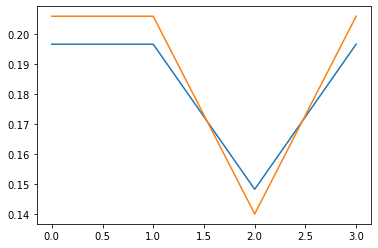

In [14]:
plt.plot(train_history)
plt.plot(val_history)

# Improving training process

We implement a few key optimisatons necessary for the training of the contemporary NN.

## Learning rate decay

one of the necessary optimisation during NN training - gradual decrease speed of training (learning rate) every N epochs by d (decay). N and d are hyper parameters and should be chosen according to its eeficacy on  validation data. 

Let N be 1.

In [15]:
# TODO Implement learning rate decay inside Trainer.fit method
# Decay should happen once per epoch

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), num_epochs =5, learning_rate_decay=0.99)

initial_learning_rate = trainer.learning_rate
loss_history, train_history, val_history = trainer.fit()

assert trainer.learning_rate < initial_learning_rate, "Learning rate should've been reduced"
assert trainer.learning_rate > 0.5*initial_learning_rate, "Learning rate shouldn'tve been reduced that much!"

Loss: 2.304270, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.285685, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.218967, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.332656, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.275270, Train accuracy: 0.196667, val accuracy: 0.206000


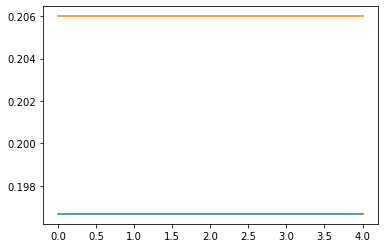

In [16]:
plt.plot(train_history)
plt.plot(val_history)

# Momentum SGD

Next big class of optimisations - using more effective method of gradient descend. We implement one of them - Momentum SGD.

This method keeps speed of descens, uses gradient for its measurement at every step and changes the weights at every step and also changes weights proportionally the speed.
(Physics Analogy: Gradients will determine the acceleration instead of the speed, but the presence of friction.)

```
velocity = momentum * velocity - learning_rate * gradient 
w = w + velocity
```

`momentum` the decay, also hyper-parameter гиперпараметром (luckily,the default values is good, typically the values are in the range -- 0.8-0.99).

Few useful references, where method is explained in details:  
http://cs231n.github.io/neural-networks-3/#sgd  
https://distill.pub/2017/momentum/

In [17]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-4, learning_rate_decay=0.99)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

Loss: 2.325217, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.292303, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.298031, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.309406, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.298464, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.290798, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.308250, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.282150, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.277601, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.282915, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.345439, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.300894, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.249748, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.305173, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.246124, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.289285, Train acc

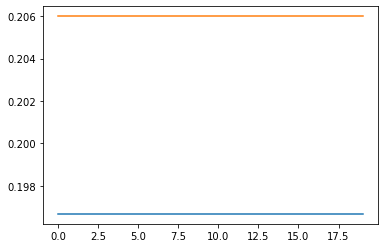

In [18]:
plt.plot(train_history)
plt.plot(val_history)

# Let's train it!

## Last test - overfit on a small data set

The good way to check if everything was implemented right - to over-fit NN on small data set.  
Our model is powerful enough to predict a small data set ideally, therefore we expect to reach 100% quickly on training data set. 

If this is not happening you made a mistake somewhere!

In [26]:
data_size = 15
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-2)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-1, num_epochs=20, batch_size=5)

# You should expect this to reach 1.0 training accuracy 
loss_history, train_history, val_history = trainer.fit()

Loss: 2.320053, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.303593, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.323044, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.294019, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 2.246865, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.305646, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.198033, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.217674, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 1.934065, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.862267, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.736181, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.224294, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.879045, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.213779, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 1.717429, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.317009, Train acc

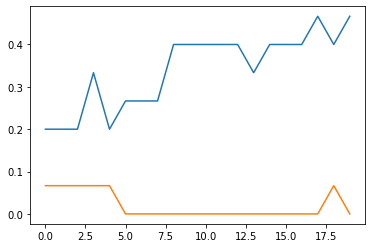

In [27]:
plt.plot(train_history)
plt.plot(val_history)

Let's find hyper parameters make it train to 1.0 accuracy in 20 epochs or less.
Find them.

In [28]:
# Now, tweak some hyper parameters and make it train to 1.0 accuracy in 20 epochs or less
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 1200, reg = 9e-3)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
# TODO: Change any hyperparamers or optimizators to reach training accuracy in 20 epochs
trainer = Trainer(model, dataset, SGD(), learning_rate=5e-1, num_epochs=20, batch_size=100)

loss_history, train_history, val_history = trainer.fit()

Loss: 2.335925, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 2.312190, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.284143, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.231907, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.104812, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.905892, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 1.714329, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 1.596637, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.554186, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 1.699044, Train accuracy: 0.333333, val accuracy: 0.133333
Loss: 1.701344, Train accuracy: 0.533333, val accuracy: 0.000000
Loss: 1.370409, Train accuracy: 0.666667, val accuracy: 0.133333
Loss: 1.230902, Train accuracy: 0.666667, val accuracy: 0.000000
Loss: 1.146949, Train accuracy: 0.666667, val accuracy: 0.133333
Loss: 1.093926, Train accuracy: 0.733333, val accuracy: 0.000000
Loss: 1.094587, Train acc

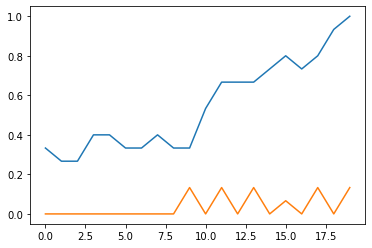

In [29]:
plt.plot(train_history)
plt.plot(val_history)

# Finally main task!

Train the best NN! You may add and change the parameters, change the number of the neurons in the layers and experiment. 

Achive accuracy better than **40%** on validation set.

In [30]:
# Let's train the best one-hidden-layer network we can

learning_rates = 5e-1
reg_strength = 9e-3
learning_rate_decay = 0.9
hidden_layer_size = 500
num_epochs = 5
batch_size = 64

best_classifier = None
best_val_accuracy = None

loss_history = []
train_history = []
val_history = []


model = TwoLayerNet(n_input=train_X.shape[1], n_output=10, hidden_layer_size=hidden_layer_size, reg=reg_strength)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate=learning_rates, num_epochs=num_epochs, batch_size=batch_size, learning_rate_decay=learning_rate_decay)

loss_history, train_history, val_history = trainer.fit()
# best_classifier = None
best_val_accuracy = max(val_history)


# You should expect to get to at least 40% of valudation accuracy
# Save loss/train/history of the best classifier to the variables above

print('best validation accuracy achieved: %f' % best_val_accuracy)

Loss: 2.352108, Train accuracy: 0.199111, val accuracy: 0.203000
Loss: 1.940811, Train accuracy: 0.371889, val accuracy: 0.359000
Loss: 2.414012, Train accuracy: 0.390111, val accuracy: 0.395000
Loss: 1.980579, Train accuracy: 0.536556, val accuracy: 0.535000
Loss: 1.966903, Train accuracy: 0.459444, val accuracy: 0.481000
best validation accuracy achieved: 0.535000


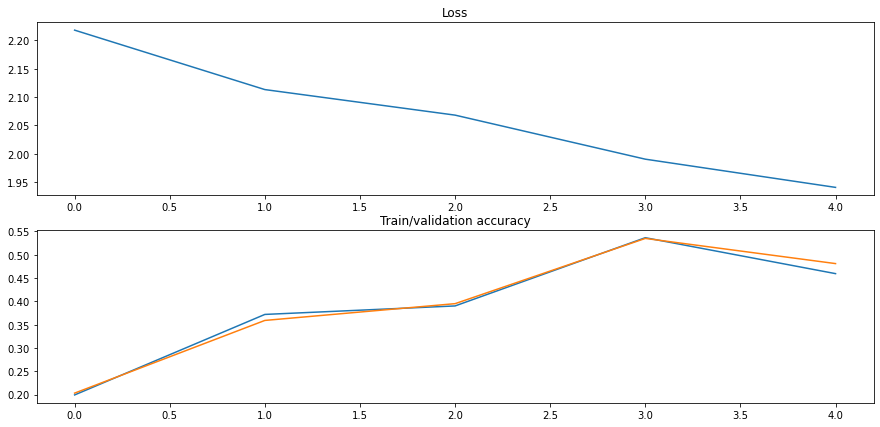

In [31]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.title("Loss")
plt.plot(loss_history)
plt.subplot(212)
plt.title("Train/validation accuracy")
plt.plot(train_history)
plt.plot(val_history)

# As usual let's access how our best model performs on test data 

In [25]:
best_classifier = model
test_pred = best_classifier.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

Neural net test set accuracy: 0.429000
